In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import pandas as pd
import healpy as hp
import time
import warnings
from pixell import reproject
from classy import Class
%matplotlib inline
import pysm3 
import ST

In [3]:
res_2048_arcmin = hp.nside2resol(2048, arcmin=True)
res_1024_arcmin = hp.nside2resol(1024, arcmin=True)
res_0512_arcmin = hp.nside2resol(512, arcmin=True)
res_0256_arcmin = hp.nside2resol(256, arcmin=True)
res_2048 = hp.nside2resol(2048, arcmin=False)
res_1024 = hp.nside2resol(1024, arcmin=False)
res_0512 = hp.nside2resol(512, arcmin=False)
res_0256 = hp.nside2resol(256, arcmin=False)

In [4]:
map_sz = hp.read_map ("/Users/arefe/Projects/ScatteringTransform/maps/COM_CompMap_Compton-SZMap-milca-ymaps_2048_R2.00.fits")

In [4]:
#map_sz = hp.read_map ("/Users/arefe/Projects/ScatteringTransform/maps/COM_CompMap_SZ-commander_0256_R2.00.fits")

In [5]:
map_sz_0256 = hp.ud_grade(map_sz , nside_out=256)

In [8]:
nside_0256 = hp.pixelfunc.get_nside(map_sz_0256)
print (nside_0256)

256


In [6]:
cl_sz_0256 = hp.anafast(map_sz_0256)

In [9]:
lmax_0256=3*nside_0256-1
ell_0256=np.arange(0,lmax_0256+1)
norm_0256 = ell_0256 * (ell_0256+1) / (2*np.pi)
dl_sz_0256 = cl_sz_0256*norm_0256

<ipython-input-10-a69032c6eb21>:1: RuntimeWarning: divide by zero encountered in true_divide
  ellsc_0256 = 360*60/ell_0256
<ipython-input-10-a69032c6eb21>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(ellsc_0256,np.log(dl_sz_0256))


Text(0, 0.5, '$D_l$')

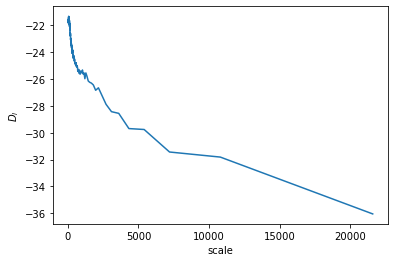

In [10]:
ellsc_0256 = 360*60/ell_0256
#ellsc = ellsc[::-1]
plt.plot(ellsc_0256,np.log(dl_sz_0256))
plt.xlabel("scale")
plt.ylabel("$D_l$")

<ipython-input-11-c539661f4690>:6: RuntimeWarning: divide by zero encountered in true_divide
  ellsc_0256 = 360*60/ell_0256
<ipython-input-11-c539661f4690>:8: RuntimeWarning: divide by zero encountered in log
  plt.plot(ellsc_0256,np.log(dl_sz_0256))


Text(0, 0.5, '$D_l$')

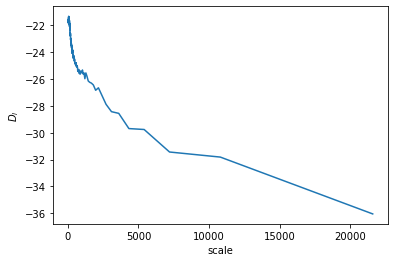

In [11]:
lmax_0256=3*nside_0256-1
ell_0256=np.arange(0,lmax_0256+1)
norm_0256 = ell_0256 * (ell_0256+1) / (2*np.pi)
dl_sz_0256 = cl_sz_0256*norm_0256

ellsc_0256 = 360*60/ell_0256
#ellsc = ellsc[::-1]
plt.plot(ellsc_0256,np.log(dl_sz_0256))
plt.xlabel("scale")
plt.ylabel("$D_l$")

In [12]:
resol_0256 = hp.nside2resol(nside_0256 , arcmin = False )
resol_0256_arcmin = hp.nside2resol(nside_0256 , arcmin=True)

In [13]:
jmax = int(np.floor(np.log(2*np.pi *0.75 /res_0256 / 2)/np.log(2)))
print(jmax)
theta_bin = 10000

9


In [16]:
Jf=np.arange(jmax)
scale_0256=2**Jf*((2*resol_0256_arcmin)/0.75)

In [17]:
morlet_arr_0256 = ST.morlet_arr (resol_0256, jmax , lmax_0256, theta_bin)
#gaus_l_0256 = s1.gaus_arr (resol_0256, jmax, lmax_0256, theta_bin)

/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1242: ComplexWarning: Casting complex values to real discards the imaginary part
  window[0] = trapz(beam * p0 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1243: ComplexWarning: Casting complex values to real discards the imaginary part
  window[1] = trapz(beam * p1 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1247: ComplexWarning: Casting complex values to real discards the imaginary part
  window[l] = trapz(beam * p2 * st, theta)


In [18]:
%%time 
s1_sz_0256 , i1_sz_0256 = ST.compS1 (map_sz_0256 , morlet_arr_0256, jmax,  nside_0256 )

0
1
2
3
4
5
6
7
8
CPU times: user 2.18 s, sys: 106 ms, total: 2.28 s
Wall time: 958 ms


In [19]:
%%time 
s2_sz_0256 , i2_sz_0256  = ST.compS2 ( i1_sz_0256, morlet_arr_0256 , jmax,  nside_0256 )

0
1
2
3
4
5
6
7
8
CPU times: user 19.5 s, sys: 641 ms, total: 20.1 s
Wall time: 7.12 s


In [21]:
S0 =  np.mean (np.abs(map_sz_0256))
print(S0)

2.7175493e-06


In [25]:
alm_sz_0256 = hp.map2alm (map_sz_0256)
almsize_0256 = alm_sz_0256.shape[0]
mapsize_0256 = map_sz_0256.shape[0]

In [26]:
alm_delta_0256 = np.zeros(almsize_0256,dtype=np.complex_)
alm_delta_0256[:] = 1+0j
map_delta_0256 = hp.alm2map (alm_delta_0256, nside_0256)

In [29]:
S1_delta , i1_delta = ST.compS1 (map_delta_0256 , morlet_arr_0256 , jmax, nside_0256)
S2_delta , i2_delta = ST.compS2 (i1_delta, morlet_arr_0256, jmax, nside_0256)

0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8


In [30]:
S2_normalized = s2_sz_0256/S2_delta
S1_normalized = s1_sz_0256/S1_delta

In [31]:
S1_normalized

array([1.17547031e-07, 2.12224429e-07, 3.72296118e-07, 4.09355563e-07,
       4.57551425e-07, 5.44490937e-07, 5.49664568e-07, 3.02772344e-07,
       1.49904571e-07])

In [32]:
I0sqrt = np.mean (map_sz_0256**2)
print (I0sqrt)

7.4195433e-10


In [33]:
S2_sum = 0
for i in range (jmax):
    for j in range (i+1 , jmax):
        S2_sum+=S2_normalized[i,j]**2

In [36]:
RHS = S0**2 + np.sum (S1_normalized**2) + S2_sum

In [37]:
(I0sqrt-RHS)/I0sqrt

0.9853510420856555

In [38]:
map_sz_0512 = hp.ud_grade(map_sz , nside_out=512)

In [39]:
nside_0512 = hp.pixelfunc.get_nside(map_sz_0512)
print (nside_0512)

512


In [40]:
cl_sz_0512 = hp.anafast(map_sz_0512)

In [41]:
lmax_0512=3*nside_0512-1
ell_0512=np.arange(0,lmax_0512+1)
norm_0512 = ell_0512* (ell_0512+1) / (2*np.pi)
dl_sz_0512 = cl_sz_0512*norm_0512

<ipython-input-42-a6c157b7a26d>:1: RuntimeWarning: divide by zero encountered in true_divide
  ellsc_0512 = 360*60/ell_0512
<ipython-input-42-a6c157b7a26d>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(ellsc_0512,np.log(dl_sz_0512))


Text(0, 0.5, '$D_l$')

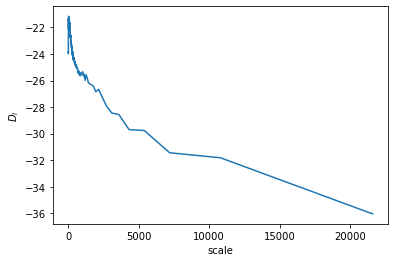

In [42]:
ellsc_0512 = 360*60/ell_0512
#ellsc = ellsc[::-1]
plt.plot(ellsc_0512,np.log(dl_sz_0512))
plt.xlabel("scale")
plt.ylabel("$D_l$")

<ipython-input-11-c539661f4690>:6: RuntimeWarning: divide by zero encountered in true_divide
  ellsc_0256 = 360*60/ell_0256
<ipython-input-11-c539661f4690>:8: RuntimeWarning: divide by zero encountered in log
  plt.plot(ellsc_0256,np.log(dl_sz_0256))


Text(0, 0.5, '$D_l$')

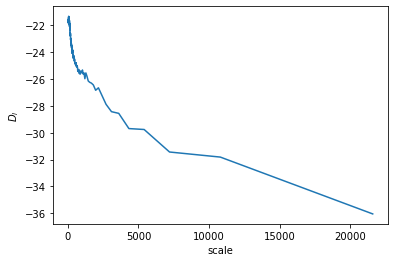

In [11]:
lmax_0256=3*nside_0256-1
ell_0256=np.arange(0,lmax_0256+1)
norm_0256 = ell_0256 * (ell_0256+1) / (2*np.pi)
dl_sz_0256 = cl_sz_0256*norm_0256

ellsc_0256 = 360*60/ell_0256
#ellsc = ellsc[::-1]
plt.plot(ellsc_0256,np.log(dl_sz_0256))
plt.xlabel("scale")
plt.ylabel("$D_l$")

In [43]:
resol_0512 = hp.nside2resol(nside_0512 , arcmin = False )
resol_0512_arcmin = hp.nside2resol(nside_0512 , arcmin=True)

In [45]:
jmax = int(np.floor(np.log(2*np.pi *0.75 /res_0512 / 2)/np.log(2)))
print(jmax)
theta_bin = 10000

10


In [46]:
Jf=np.arange(jmax)
scale_0256=2**Jf*((2*resol_0512_arcmin)/0.75)

In [47]:
morlet_arr_0512 = ST.morlet_arr (resol_0512, jmax , lmax_0512, theta_bin)
#gaus_l_0256 = s1.gaus_arr (resol_0256, jmax, lmax_0256, theta_bin)

/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1242: ComplexWarning: Casting complex values to real discards the imaginary part
  window[0] = trapz(beam * p0 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1243: ComplexWarning: Casting complex values to real discards the imaginary part
  window[1] = trapz(beam * p1 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1247: ComplexWarning: Casting complex values to real discards the imaginary part
  window[l] = trapz(beam * p2 * st, theta)


In [48]:
%%time 
s1_sz_0512 , i1_sz_0512 = ST.compS1 (map_sz_0512 , morlet_arr_0512, jmax,  nside_0512 )

0
1
2
3
4
5
6
7
8
9
CPU times: user 16.6 s, sys: 489 ms, total: 17.1 s
Wall time: 7 s


In [49]:
%%time 
s2_sz_0512 , i2_sz_0512  = ST.compS2 ( i1_sz_0512, morlet_arr_0512 , jmax,  nside_0512 )

0
1
2
3
4
5
6
7
8
9
CPU times: user 3min 38s, sys: 5.28 s, total: 3min 43s
Wall time: 1min 16s


In [21]:
S0 =  np.mean (np.abs(map_sz_0512))
print(S0)

2.7175493e-06


In [50]:
alm_sz_0512 = hp.map2alm (map_sz_0512)
almsize_0512 = alm_sz_0512.shape[0]
mapsize_0512 = map_sz_0512.shape[0]

In [51]:
alm_delta_0512 = np.zeros(almsize_0512,dtype=np.complex_)
alm_delta_0512[:] = 1+0j
map_delta_0512 = hp.alm2map (alm_delta_0512, nside_0512)

In [52]:
S1_delta_0512 , i1_delta_0512 = ST.compS1 (map_delta_0512 , morlet_arr_0512 , jmax, nside_0512)
S2_delta_0512 , i2_delta_0512 = ST.compS2 (i1_delta_0512, morlet_arr_0512, jmax, nside_0512)

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


In [53]:
S2_normalized = s2_sz_0512/S2_delta_0512
S1_normalized = s1_sz_0512/S1_delta_0512

In [54]:
S1_normalized

array([4.34178288e-08, 1.36619625e-07, 2.95952791e-07, 3.76191327e-07,
       4.10407646e-07, 4.57691057e-07, 5.44510681e-07, 5.49666180e-07,
       3.02745060e-07, 1.49910241e-07])

In [55]:
I0sqrt = np.mean (map_sz_0512**2)
print (I0sqrt)

9.855176e-10


In [56]:
S2_sum = 0
for i in range (jmax):
    for j in range (i+1 , jmax):
        S2_sum+=S2_normalized[i,j]**2

In [57]:
RHS = S0**2 + np.sum (S1_normalized**2) + S2_sum

In [58]:
(I0sqrt-RHS)/I0sqrt

0.988935012619213